# Multidimensional Scaling Analysis
In this notebook, we follow the steps for a multidimensional scaling analysis (MDS) example using an intuitive example: distances between U.S. cities.

This example reproduces the results in the following source: http://www.analytictech.com/networks/mds.htm

### Import modules
Begin by importing the following modules:

In [1]:
import numpy as np
from scipy.spatial import distance
from scipy import linalg
import matplotlib.pyplot as plt

### Create the "dissimilarity" matrix
To begin an MDS analysis, begin by computing the "dissimilarity" matrix $D$. In this example, the "dissimilarity" matrix is the Euclidean distance between U.S. cities.

In [2]:
# define the cities
cities = ['Boston','NY','DC','Miami','Chicago','Seattle','SF','LA','Denver']

In [3]:
# replicate the distance matrix
D = np.array([[    0,  206,  429, 1504,  963, 2976, 3095, 2979, 1949],
              [  206,    0,  233, 1308,  802, 2815, 2934, 2786, 1771],
              [  429,  233,    0, 1075,  671, 2684, 2799, 2631, 1616],
              [ 1504, 1308, 1075,    0, 1329, 3273, 3053, 2687, 2037],
              [  963,  802,  671, 1329,    0, 2013, 2142, 2054,  996],
              [ 2976, 2815, 2684, 3273, 2013,    0,  808, 1131, 1307],
              [ 3095, 2934, 2799, 3053, 2142,  808,    0,  379, 1235],
              [ 2979, 2786, 2631, 2687, 2054, 1131,  379,    0, 1059],
              [ 1949, 1771, 1616, 2037,  996, 1307, 1235, 1059,    0]])

### Transform the dissimilarity matrix
After definining the dissimilarity matrix, transform the matrix with
$$
d_{ij}^* = -\frac{1}{2}d_{ij}^2
$$

In [4]:
# enter code to compute the D_star matrix
D_star = -0.5*D**2

Then, "center" the matrix" as 
$$
\delta_{ij}^* = d_{ij}^* - \overline{d}_i^* - \overline{d}_j^* + \overline{d}^*
$$

In [5]:
# enter code to compute the Delta_star matrix
Delta_star = D_star - np.mean(D_star, axis=0) - np.mean(D_star, axis=1) + np.mean(D_star)

### Compute the eigenvalues and eigenvectors of the matrix

In [6]:
# compute the eigenvectors and eigenvalues of the centered matrix
values, vectors = np.linalg.eig(Delta_star)

# remove the (zero) imaginary part from the eigenvalues
values = np.real(values)
vectors = np.real(vectors)
print(values)
print(vectors)

[ 1.37481410e+07  1.00268552e+05  1.00268552e+05  2.06022983e+06
  1.82869837e+05  7.00748486e+04  3.08634594e+03 -5.86537156e+04
 -2.07149401e+05]
[[ 0.32839421 -0.06414497 -0.06414497 -0.33939487 -0.45966884  0.24088219
  -0.35678534 -0.39286196 -0.0320031 ]
 [ 0.28172752  0.07302956  0.07302956 -0.19943358 -0.18049466 -0.20148304
   0.78465698  0.20329258 -0.07347927]
 [ 0.24422995  0.17816084  0.17816084 -0.05736344  0.23285422 -0.41261378
  -0.47710398  0.48065132 -0.3348798 ]
 [ 0.30189845 -0.10157398 -0.10157398  0.67041836  0.27448479  0.06700446
   0.00736388 -0.0617581   0.35274495]
 [ 0.05710404  0.45069343  0.45069343 -0.01397803  0.41587309  0.56190203
   0.11209013 -0.18065207 -0.24046387]
 [-0.4551185  -0.0495032  -0.0495032  -0.44643765  0.4857769  -0.19957926
   0.01212724 -0.19871392  0.28419021]
 [-0.48168286 -0.00292268 -0.00292268  0.08607787 -0.24081115  0.48553029
  -0.03660505  0.58236169 -0.04074197]
 [-0.42489635  0.11728304  0.11728304  0.40759069 -0.17000581

In [8]:
# check that the values are sorted
values

# if they are not, then sort them
indices = np.flip(np.argsort(values))
print(indices)

# sorting the eigenvalues and eigenvectors so that
# the first two eigenvalues are the largest
values = values[indices]
vectors = vectors[:, indices]

[0 1 2 4 3 5 6 7 8]


In [9]:
sorted_cities = []
for i in indices:
    sorted_cities.append(cities[i])

### Compute the Factor Loading Matrix
The factor loading matrix is the collection of eigenvectors multiplied by the square root of the eigenvalues:
$$
A = V \sqrt{\Lambda}
$$

In [10]:
# the factor loading matrix
A = vectors@np.sqrt(np.diag(values))

/var/folders/l3/d9m0h7k97bv0qcc4cbdpf9lm0000gn/T/ipykernel_12452/1434221260.py:2: RuntimeWarning: invalid value encountered in sqrt
  A = vectors@np.sqrt(np.diag(values))


### Create a plot
Plot the first two components of the MDS analysis

Text(0, 0.5, 'MDS Component 2')

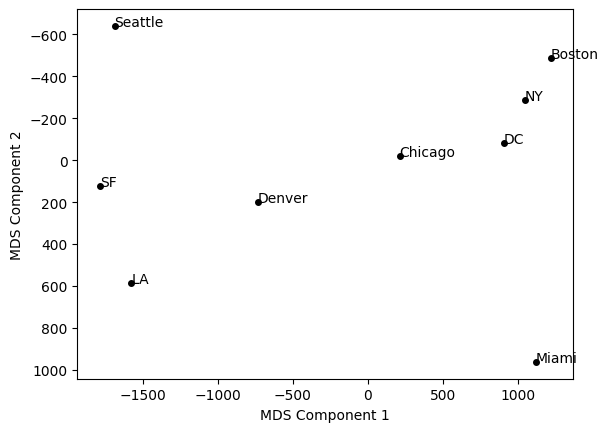

In [12]:
for i,txt in enumerate(cities):
    plt.plot(A[i,0],A[i,1],'k.', markersize=8)
    plt.text(A[i,0],A[i,1],txt)

plt.gca().invert_yaxis()

plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')